## Ibovespa Stocks Analysis

### 1. Bibliotecas Utilizadas

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 2. Conjunto de Dados (B3 Stocks)

- O conjunto de dados ***b3_stocks*** apresenta informações sobre a cotação de diferentes ações entre os anos de **1994 a 2020 (Junho)**

In [2]:
b3_stocks = pd.read_csv('../data/b3_stocks_1994_2020.csv')

In [3]:
b3_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809947 entries, 0 to 1809946
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   ticker    object 
 2   open      float64
 3   close     float64
 4   high      float64
 5   low       float64
 6   volume    float64
dtypes: float64(5), object(2)
memory usage: 96.7+ MB


In [4]:
b3_stocks.tail()

,datetime,ticker,open,close,high,low,volume
1809942,2020-06-30,WLMM4,17.84,18.50,18.99,17.84,105747.00
1809943,2020-06-30,WSON33,34.27,35.59,36.18,33.61,4928729.00
1809944,2020-06-30,XBOV11,93.57,93.29,94.36,93.29,10334.50
1809945,2020-06-30,XPIE11,92.98,91.00,93.50,91.00,75828.82
1809946,2020-06-30,YDUQ3,33.67,33.65,34.59,33.18,88390681.00


## 3. Visualizações

### 3.1 Ações Tradicionais (PETR4 e VALE3)

In [5]:
petr4 = b3_stocks[(b3_stocks['ticker'] == 'PETR4') & (b3_stocks['datetime'] >= '2015-01-01')]
petr4_dates = pd.to_datetime(petr4['datetime'])
petr4_close = petr4['close']

vale3 = b3_stocks[(b3_stocks['ticker'] == 'VALE3') & (b3_stocks['datetime'] >= '2015-01-01')]
vale3_dates = pd.to_datetime(vale3['datetime'])
vale3_close = vale3['close']

In [6]:
petr4.tail()

,datetime,ticker,open,close,high,low,volume
1807968,2020-06-24,PETR4,21.49,21.00,21.56,20.71,1.376390e+09
1808421,2020-06-25,PETR4,20.91,21.47,21.47,20.73,9.965171e+08
1808896,2020-06-26,PETR4,21.21,20.84,21.47,20.78,1.168438e+09
1809347,2020-06-29,PETR4,21.10,21.66,21.66,20.93,1.281273e+09
1809813,2020-06-30,PETR4,21.34,21.55,21.80,21.09,1.399053e+09


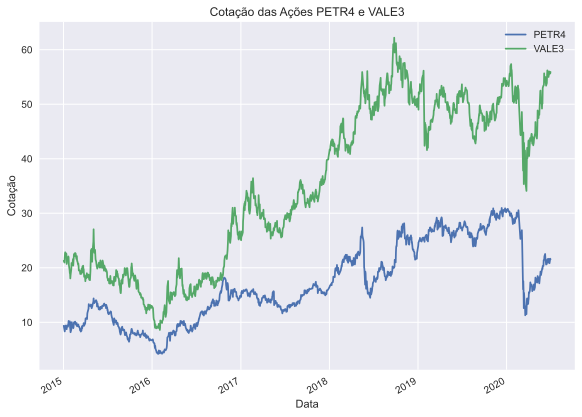

In [7]:
plt.style.use('seaborn')

plt.plot_date(petr4_dates, petr4_close, linestyle='solid', marker='')
plt.plot_date(vale3_dates, vale3_close, linestyle='solid', marker='')

plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.legend(['PETR4', 'VALE3'])
plt.title('Cotação das Ações PETR4 e VALE3')
plt.xlabel('Data')
plt.ylabel('Cotação')
plt.show()

#### 3.1.1 Correlação de Pearson

"Quanto maior for o valor absoluto do coeficiente, mais forte é a relação entre as variáveis. Para a correlação de Pearson, um valor absoluto de 1 indica uma relação linear perfeita. A correlação perto de 0 indica que não há relação linear entre as variáveis. O sinal de cada coeficiente indica a direção da relação." [1]

"You may have stocks in different sectors but if their returns depend on the same thing (e.g. the economy in a particular state) your portfolio is getting almost no protection from diversification." [2]

Referências: <br>
[1] [Interpretação dos Resultados de Correlação](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/key-results/) <br>
[2] [Why Correlation Matters for Investors?](https://smartasset.com/investing/stock-correlation) <br>
[3] [Scipy - Coeficiente de Pearson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#r8c6348c62346-1) <br>
[4] [Four ways to quantify synchrony between time series data](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

In [8]:
r, p = stats.pearsonr(petr4.dropna()['close'], vale3.dropna()['close'])
print("Correlação de Pearson: {:.2f}".format(r))

Correlação de Pearson: 0.89


### 3.2 Ações em Destaque (MGLU3 e WEGE3)

In [9]:
mglu3 = b3_stocks[(b3_stocks['ticker'] == 'MGLU3') & (b3_stocks['datetime'] >= '2015-01-01')]
mglu3_dates = pd.to_datetime(mglu3['datetime'])
mglu3_close = mglu3['close']

wege3 = b3_stocks[(b3_stocks['ticker'] == 'WEGE3') & (b3_stocks['datetime'] >= '2015-01-01')]
wege3_dates = pd.to_datetime(wege3['datetime'])
wege3_close = wege3['close']

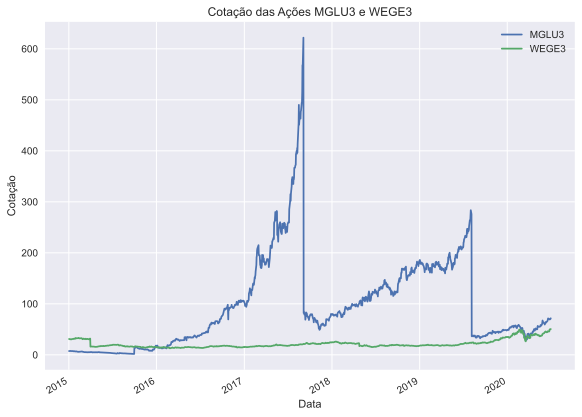

In [10]:
plt.style.use('seaborn')

plt.plot_date(petr4_dates, mglu3_close, linestyle='solid', marker='')
plt.plot_date(vale3_dates, wege3_close, linestyle='solid', marker='')

plt.gcf().autofmt_xdate()
plt.tight_layout()

plt.legend(['MGLU3', 'WEGE3'])
plt.title('Cotação das Ações MGLU3 e WEGE3')
plt.xlabel('Data')
plt.ylabel('Cotação')
plt.show()

### Análise

- O que justifica a queda no valor das ações da MGLU3 nos anos de 2017 e 2019?
    - No dia 5 de setembro de 2017 houve o desdobramento das ações, na razão de 1 para 8.
    - Novamente, em 6 de agosto de 2019, houve novo desdobramento das ações, na mesma razão de 1 para 8.

In [11]:
mglu3_17 = b3_stocks[(b3_stocks['ticker'] == 'MGLU3') & (b3_stocks['datetime'] >= '2017-09-01') & (b3_stocks['datetime'] <= '2017-09-30')]
mglu3_19 = b3_stocks[(b3_stocks['ticker'] == 'MGLU3') & (b3_stocks['datetime'] >= '2019-08-01') & (b3_stocks['datetime'] <= '2019-08-31')]

In [12]:
mglu3_17.head(3)

,datetime,ticker,open,close,high,low,volume
1547601,2017-09-01,MGLU3,579.00,564.14,603.99,561.42,197657194.0
1547935,2017-09-04,MGLU3,566.00,621.79,622.00,555.00,157591533.0
1548293,2017-09-05,MGLU3,79.76,82.00,86.40,78.56,243650457.0


In [13]:
mglu3_19.head(4)

,datetime,ticker,open,close,high,low,volume
1713442,2019-08-01,MGLU3,269.50,276.50,279.24,268.30,682317406.0
1713802,2019-08-02,MGLU3,280.60,283.55,284.79,277.50,401133774.0
1714173,2019-08-05,MGLU3,282.00,276.00,282.00,275.31,517615566.0
1714546,2019-08-06,MGLU3,35.59,36.60,37.06,35.53,635057740.0


### 3.3 Fundos Imobiliários